# World Happiness Report Project

# Project Description

*The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.*

# What is Dystopia?

*Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.*

# What are the residuals?

*The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries.*

# What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

*The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.*

*The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.*

*The Dystopia Residual is already provided in the dataset.* 

*If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.*

**You need to predict the happiness score considering all the other factors mentioned in the dataset.**

***Dataset Link-****

https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv

# Answer:-

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [113]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Exploratory Data Analysis(E.D.A)

In [114]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [115]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [116]:
#Checking null value
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [117]:
#Checking for duplicated rows
df.duplicated().sum()

0

<Axes: >

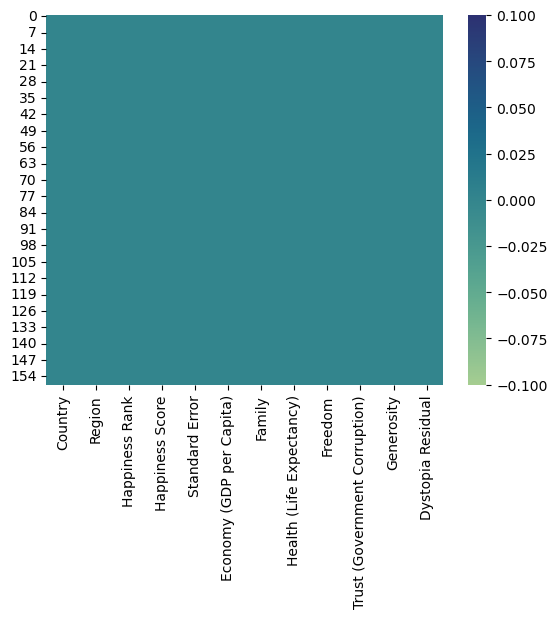

In [118]:
#Visualizing null values with heatmap
sns.heatmap(df.isnull(),cmap="crest")

In [119]:
#Checking unique values for all columns
df.nunique().to_frame("Unique value counts")

,Unique value counts
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


In [120]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

In [121]:
df.set_index("Happiness Rank",inplace=True)

In [122]:
df

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,,
1,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
154,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
155,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
156,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


**Ovservation till now:-**
    
*1) For Country column there are 158 unique names and I dont need those names while predicting "Happiness Score" So I will drop Country column.*

*2) For "Region" column there is 10 unique values and first I had  thought of dropping this columns but it can play a vital role like basis of Region,Health (Life Expectancy), Economy (GDP per Capita) these kind of datas can be affected.*

*3) Here our Target column is "Happiness Score" and difference between it's total data count with it's unique value is so less(1-means almost all values in this column are unique) so it's clear that it's a Regression problem*

In [123]:
#Dropping Country column
df.drop("Country",axis=1,inplace=True)
df.head(2)

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,
1,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


Country column is deleted.

In [124]:
df.shape

(158, 10)

# Description of Dataset

In [125]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


**Ovservation:-**


*1) Here no null value is present.*

*2) For Standard Error,Economy (GDP per Capita),Trust (Government Corruption),Generosity there are a huge difference between 75 percentile and max value,that means outliers must be present.*

*3)For Standard Error,Trust (Government Corruption),Generosity,Dystopia Residual columns mean value is greater than median(50%) thats mean these columns have right skewed data and rest of the column has left skewed data.*


# Data Visualization:-

**Bivariate analysis**

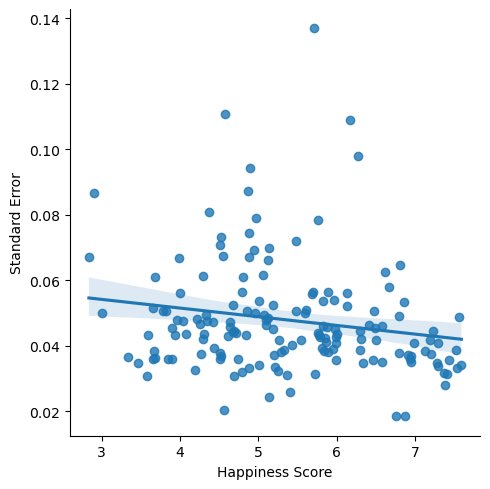

In [126]:
sns.lmplot(x="Happiness Score",y="Standard Error",data=df)

Here you can see our Target column "Happiness Score" has slightly Negative correlation with "Standard Error".

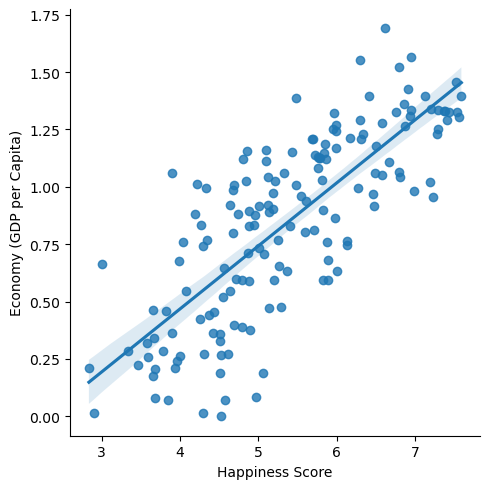

In [127]:
sns.lmplot(x="Happiness Score",y="Economy (GDP per Capita)",data=df)

Here you can see "Economy (GDP per Capita)" column  has a positive correlation with our Target column "Happiness Score".When GDP per Capita increases Happiness Score will also increases.

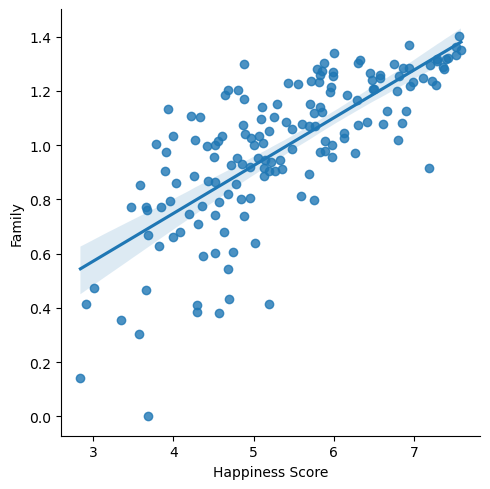

In [128]:
sns.lmplot(x="Happiness Score",y="Family",data=df)

"Family" Column also have the Positive correlation with our Target column "Happiness Score".

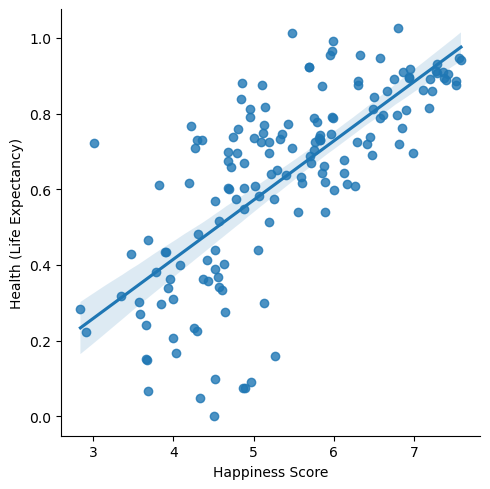

In [129]:
sns.lmplot(x="Happiness Score",y="Health (Life Expectancy)",data=df)

So "Health (Life Expectancy)" is also have Positive correlation with our Target Column.When Life Expectancy increases Happiness Score is also increased.

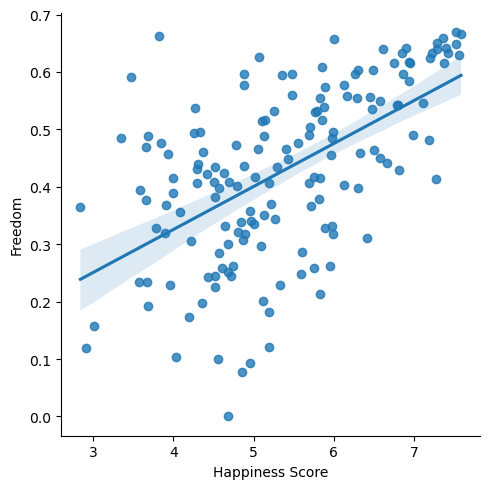

In [130]:
sns.lmplot(x="Happiness Score",y="Freedom",data=df)

"Freedom" is also positively correlated with our Target Column.

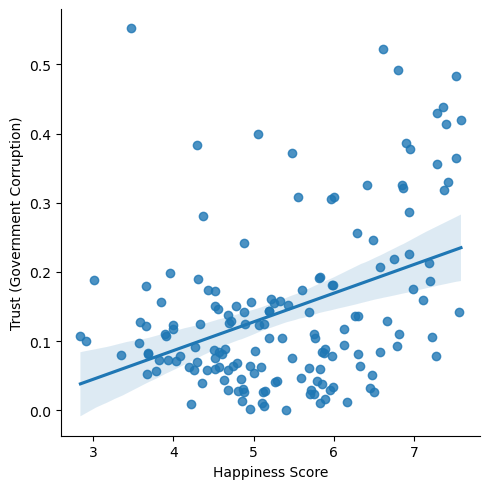

In [131]:
sns.lmplot(x="Happiness Score",y="Trust (Government Corruption)",data=df)

Trust (Government Corruption) column is slightly positive correlated with our Target column.

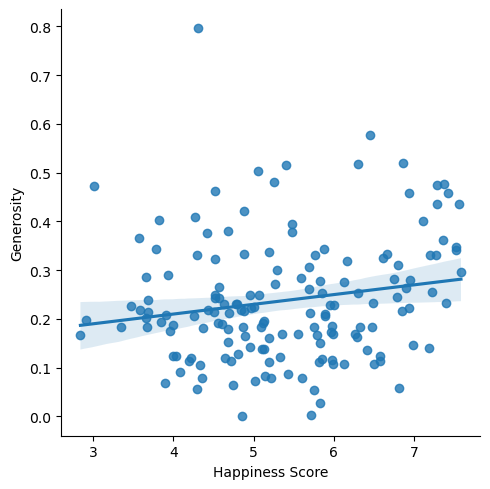

In [132]:
sns.lmplot(x="Happiness Score",y="Generosity",data=df)

Generosity column is minimally positive correlated with our Target column.

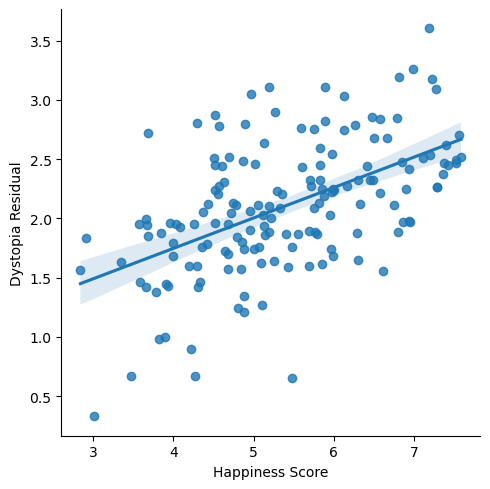

In [134]:
sns.lmplot(x="Happiness Score",y="Dystopia Residual",data=df)

Dystopia Residual column is positively correlated with our Target column.

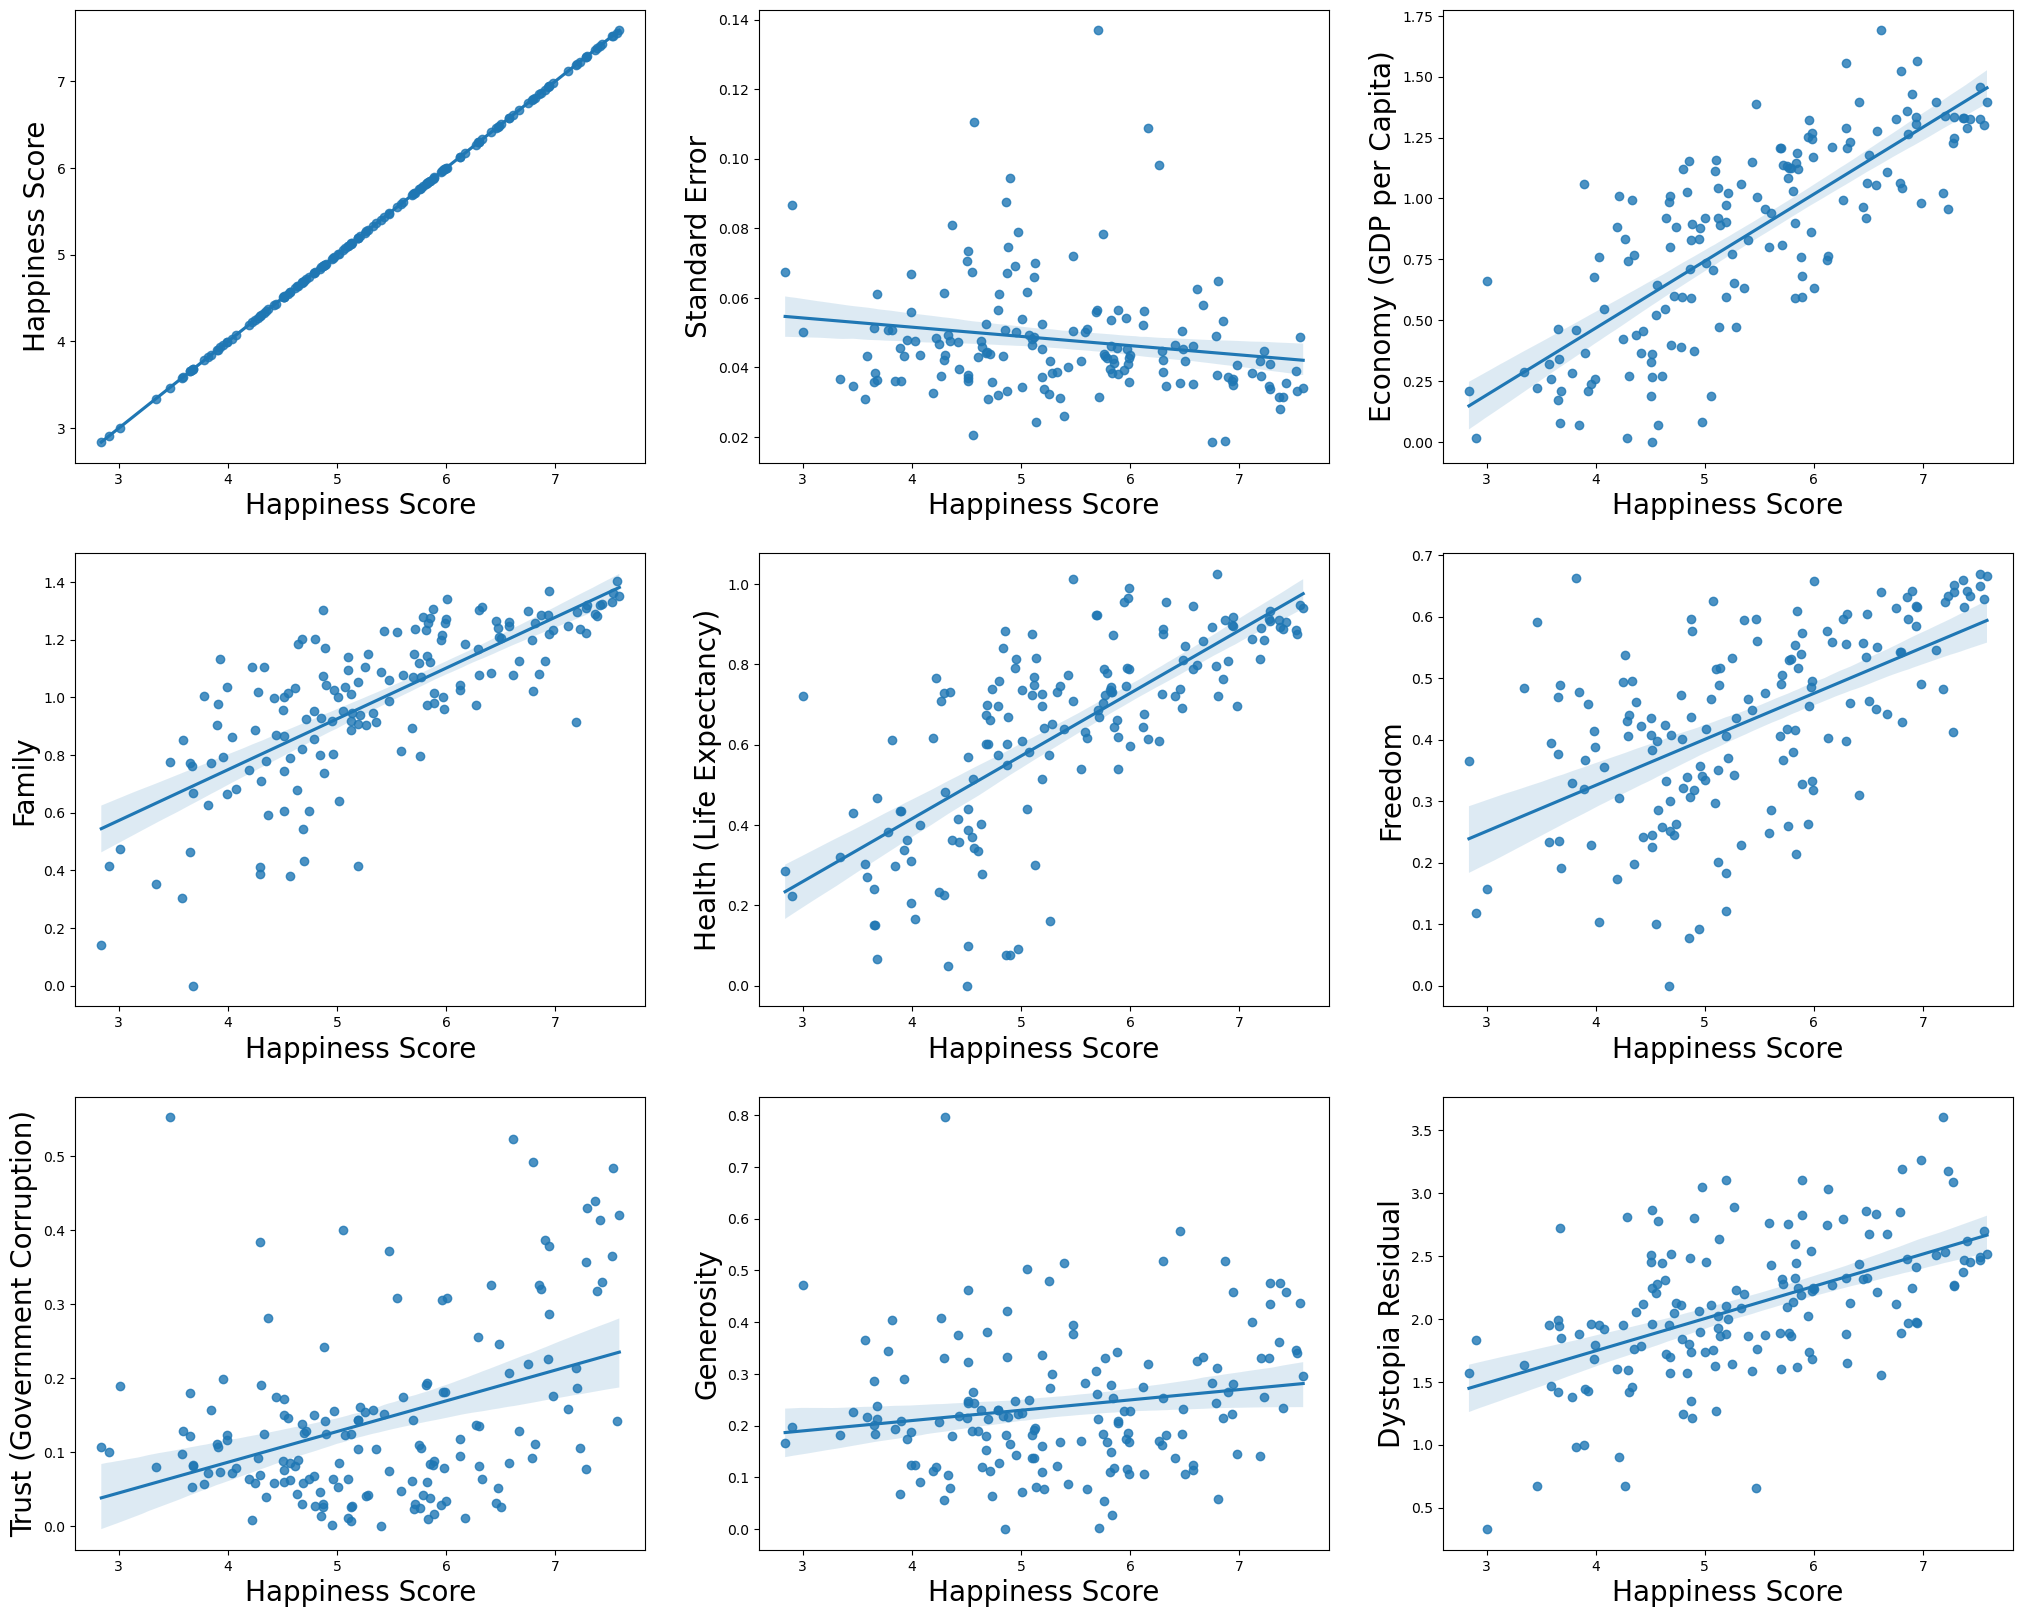

In [136]:
#Analysis of our Target column (Happiness Score) with all columns using regplot
plt.figure(figsize=(25,20))

plot=1

if plot<=14:
    for i in df.columns:
        if i=="Region":
            continue
        plt.subplot(3,3,plot)
        sns.regplot(x="Happiness Score",y=i,data=df)
        plt.xlabel("Happiness Score",fontsize=20)
        plt.ylabel(i,fontsize=20)
        
        plot+=1
    
plt.show()
    

**Multi variate analysis**

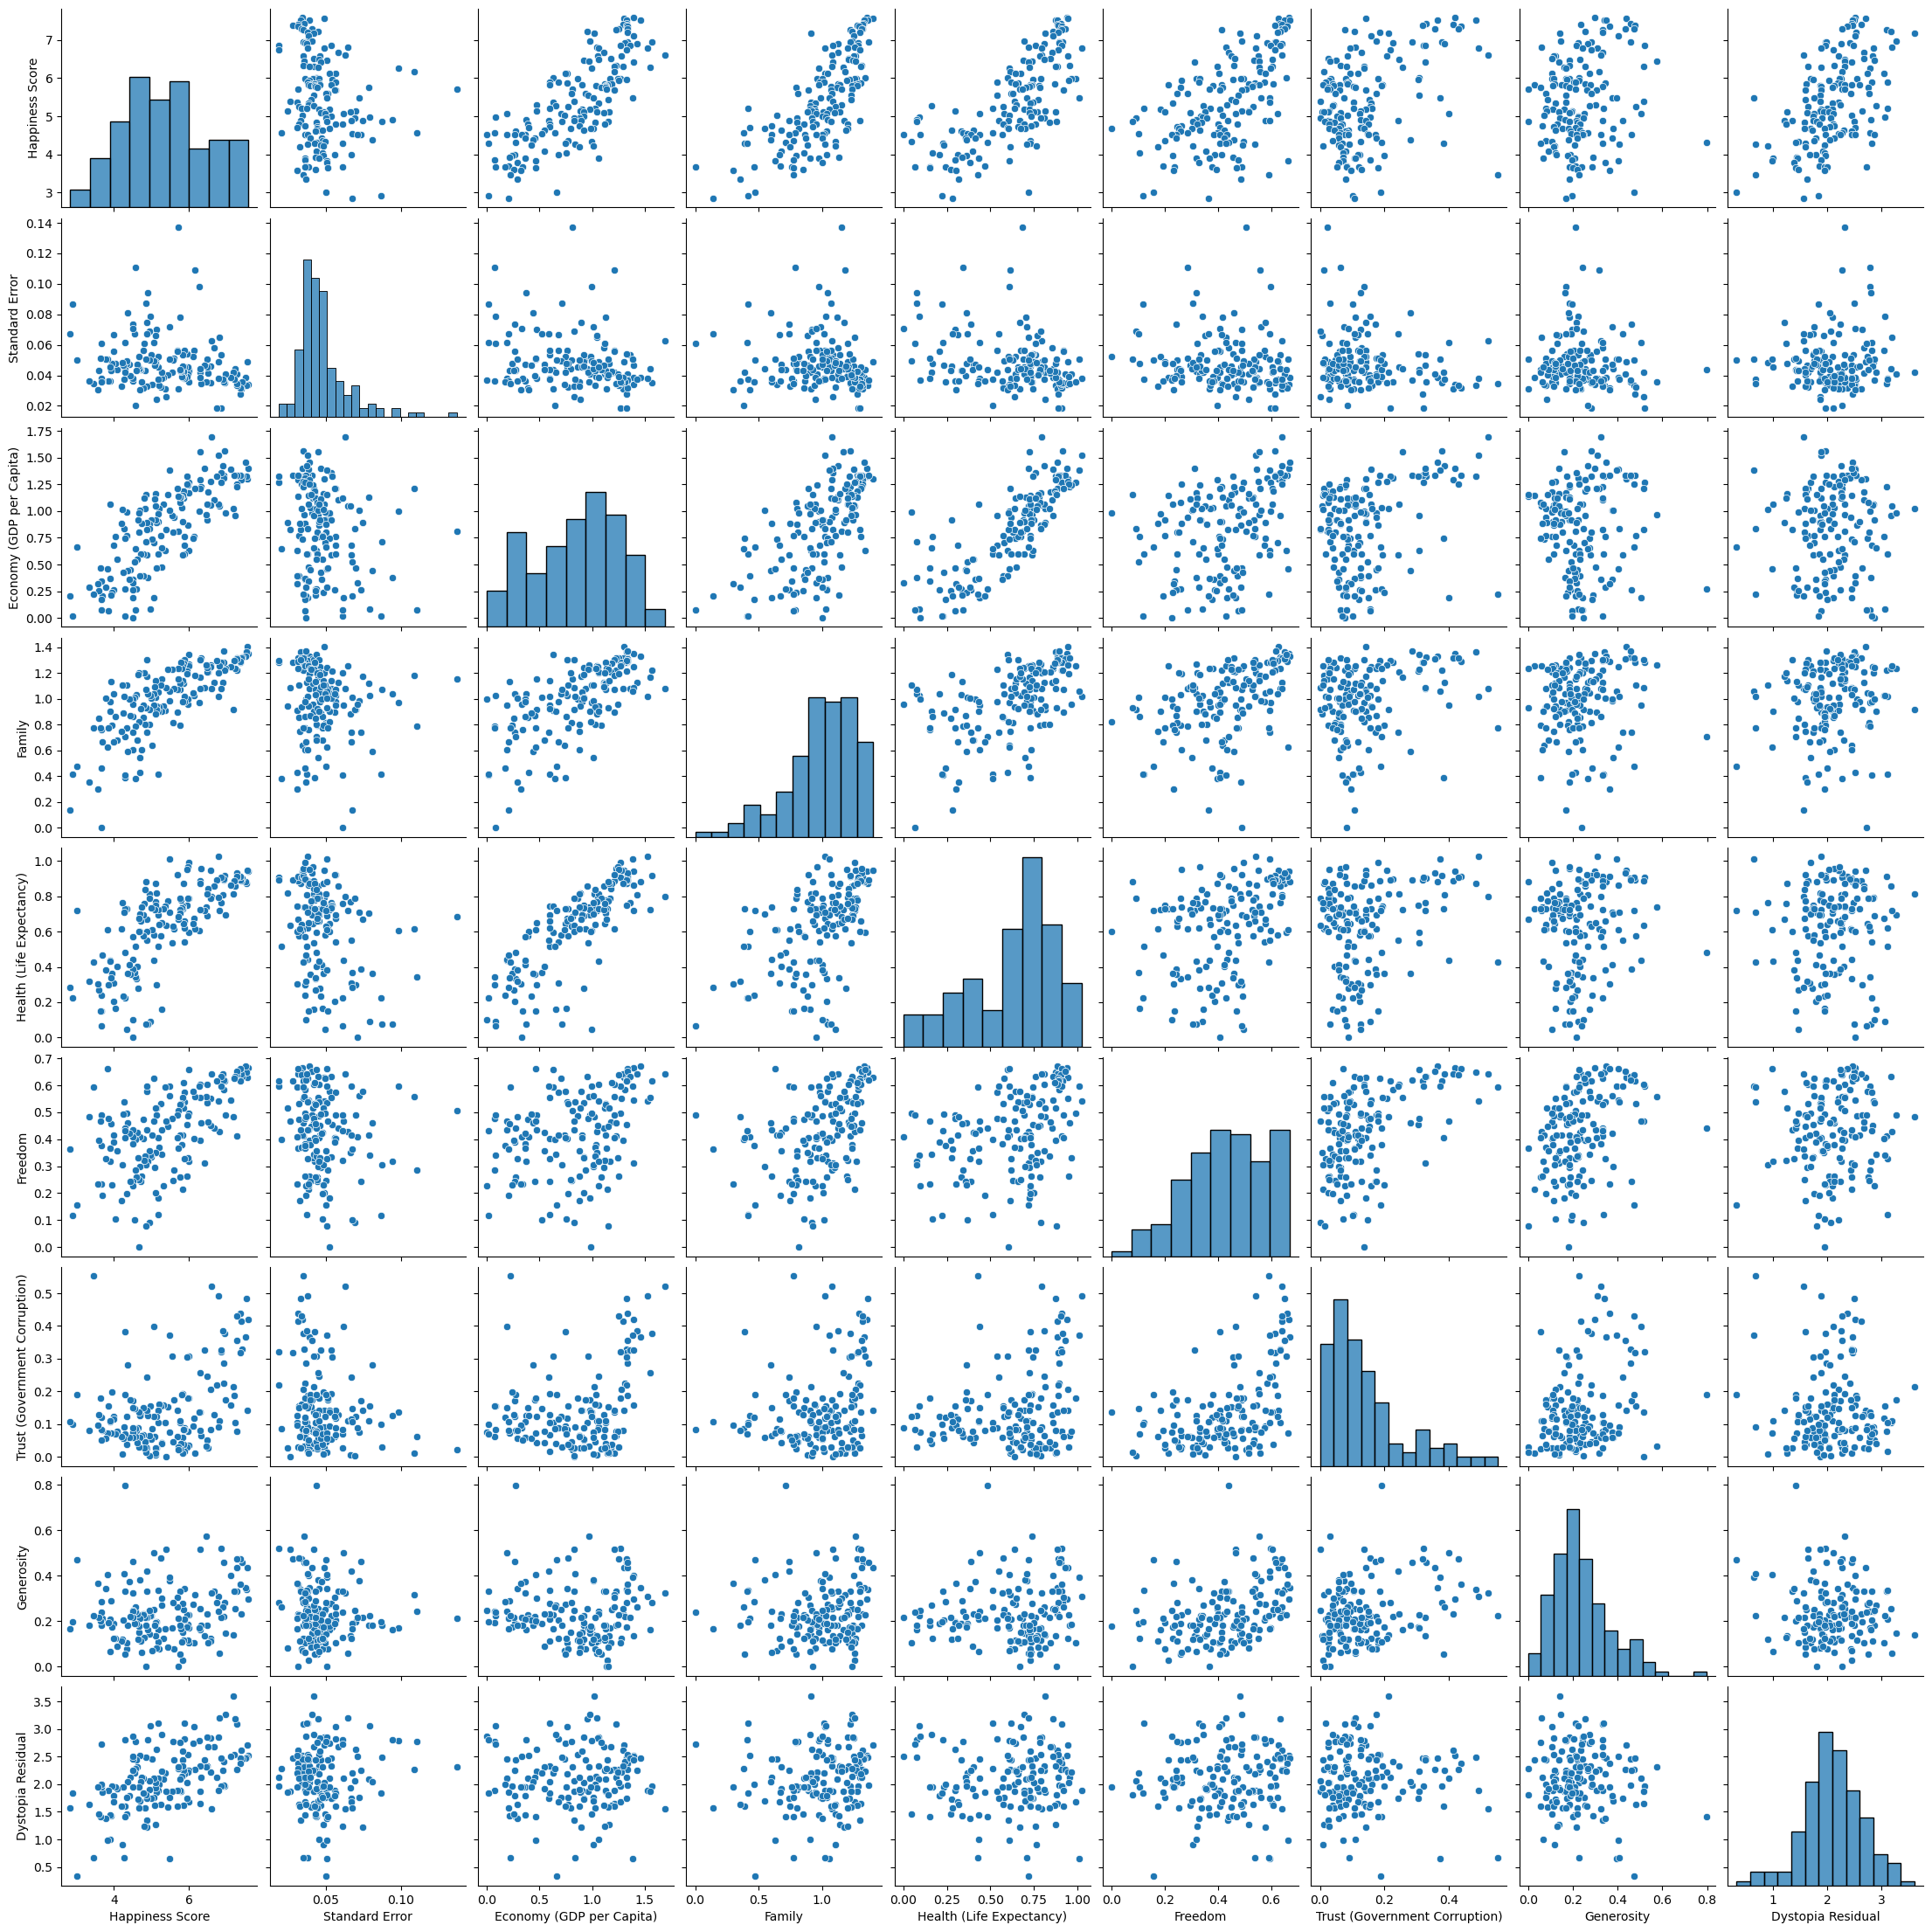

In [137]:
sns.pairplot(df,palette="Dark_2")

# Checking for Outliers

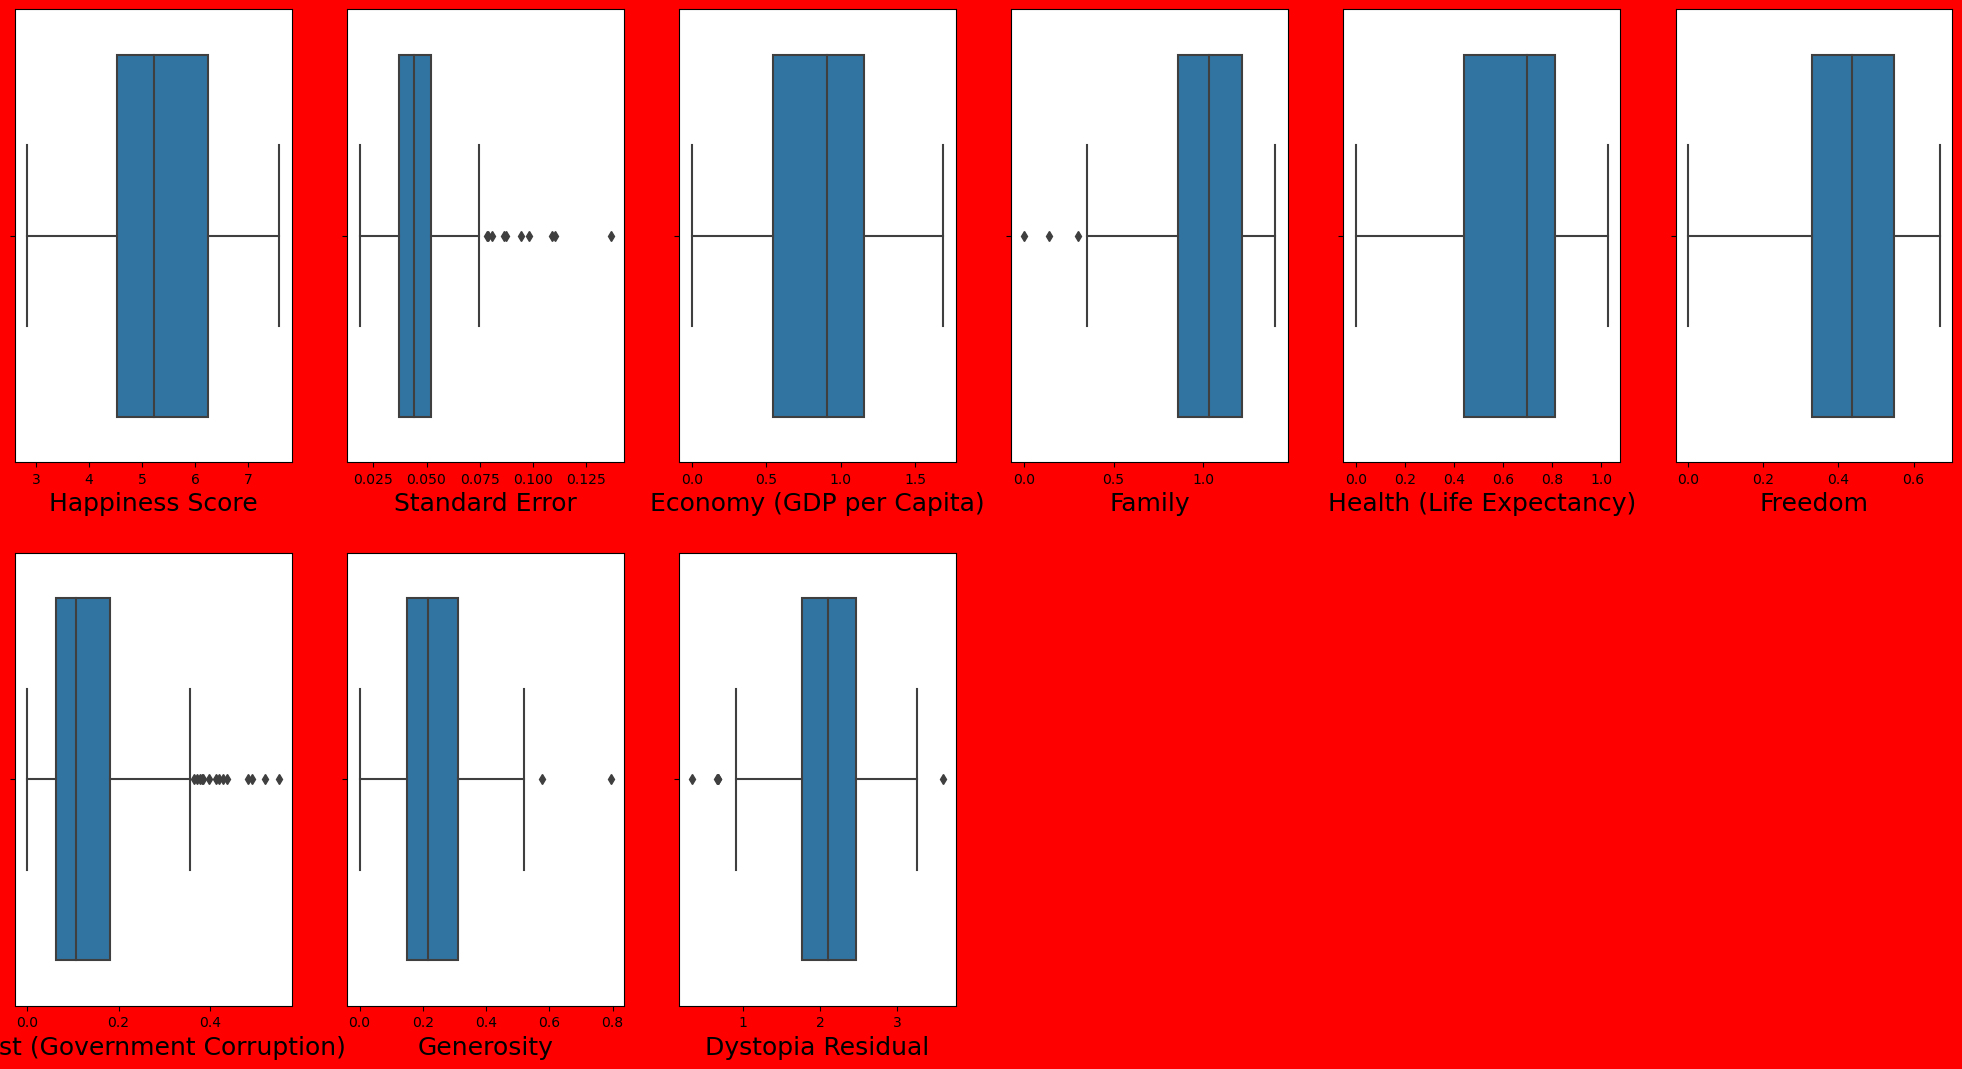

In [138]:
#Checking outliers using boxplot
plt.figure(figsize=(25,20),facecolor="r")
plot=1

for i in df.columns:
    if plot<=17:
        #I avoid Region column because it has string values and boxplot cant be use on string valiues containing columns
        if i=="Region":
            continue

        plt.subplot(3,6,plot)
        sns.boxplot(x=df[i])
        plt.xlabel(i,fontsize=18)
    plot+=1
    

plt.show()
        
    

**Observation:-**
    
Here you can see Standard Error,Family,st (Government Corruption),Generosity,Dystopia Residual has outliers,and we have to remove that.

# Removing outliers using zscore

In [139]:
from scipy.stats import zscore
wanted_features=df[["Standard Error","Economy (GDP per Capita)","Family","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity","Dystopia Residual"]]
#Here I avoid to include Happiness Score because it's our Target column and Region because it's a categorical column because it has only 10 unique values also we can't detect outliers on those column who has string values 
z=np.abs(zscore(wanted_features))
z

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,
1,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
2,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
3,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
4,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
5,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...
154,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
155,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
156,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430


In [140]:
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([5, 0, 0, 0, 6, 2, 5, 7, 2], dtype=int64))

In [141]:
#Finding outliers by giving their row and column location
z.iloc[27,5]

3.1646194851713774

**Creating outliers free dataset**

In [142]:
new_df=df[(z<3).all(axis=1)]
new_df.shape

(149, 10)

In [143]:
print("Old DataFrame",df.shape[0])
print("New DataFrame",new_df.shape[0])

Old DataFrame 158
New DataFrame 149


In [144]:
print("Data lost percentage is",((df.shape[0]-new_df.shape[0])/new_df.shape[0])*100)

Data lost percentage is 6.0402684563758395


**6% data lost is okey acceptable range is 10% but I will try IQR method to see how much data loss it gets if we use it to remove outliers.**

**Using IQR to remove outliers**

In [145]:
#3rd quantile
Q3=wanted_features.quantile(0.75)

In [146]:
#1st Quantile
Q1=wanted_features.quantile(0.25)

In [147]:
#IQR
IQR=Q3-Q1

In [148]:
new_df_2=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

In [149]:
new_df_2.shape

(126, 10)

In [150]:
print("Data lost percentage after use IQR method",(df.shape[0]-new_df_2.shape[0])/df.shape[0]*100)

Data lost percentage after use IQR method 20.253164556962027


**Here we can see 20% data lost we will get if we take IQR method to remove ouliers.So we are good with new_df that is outlier free dataset using zscore.** 

# Checking Data Distribution using visualization

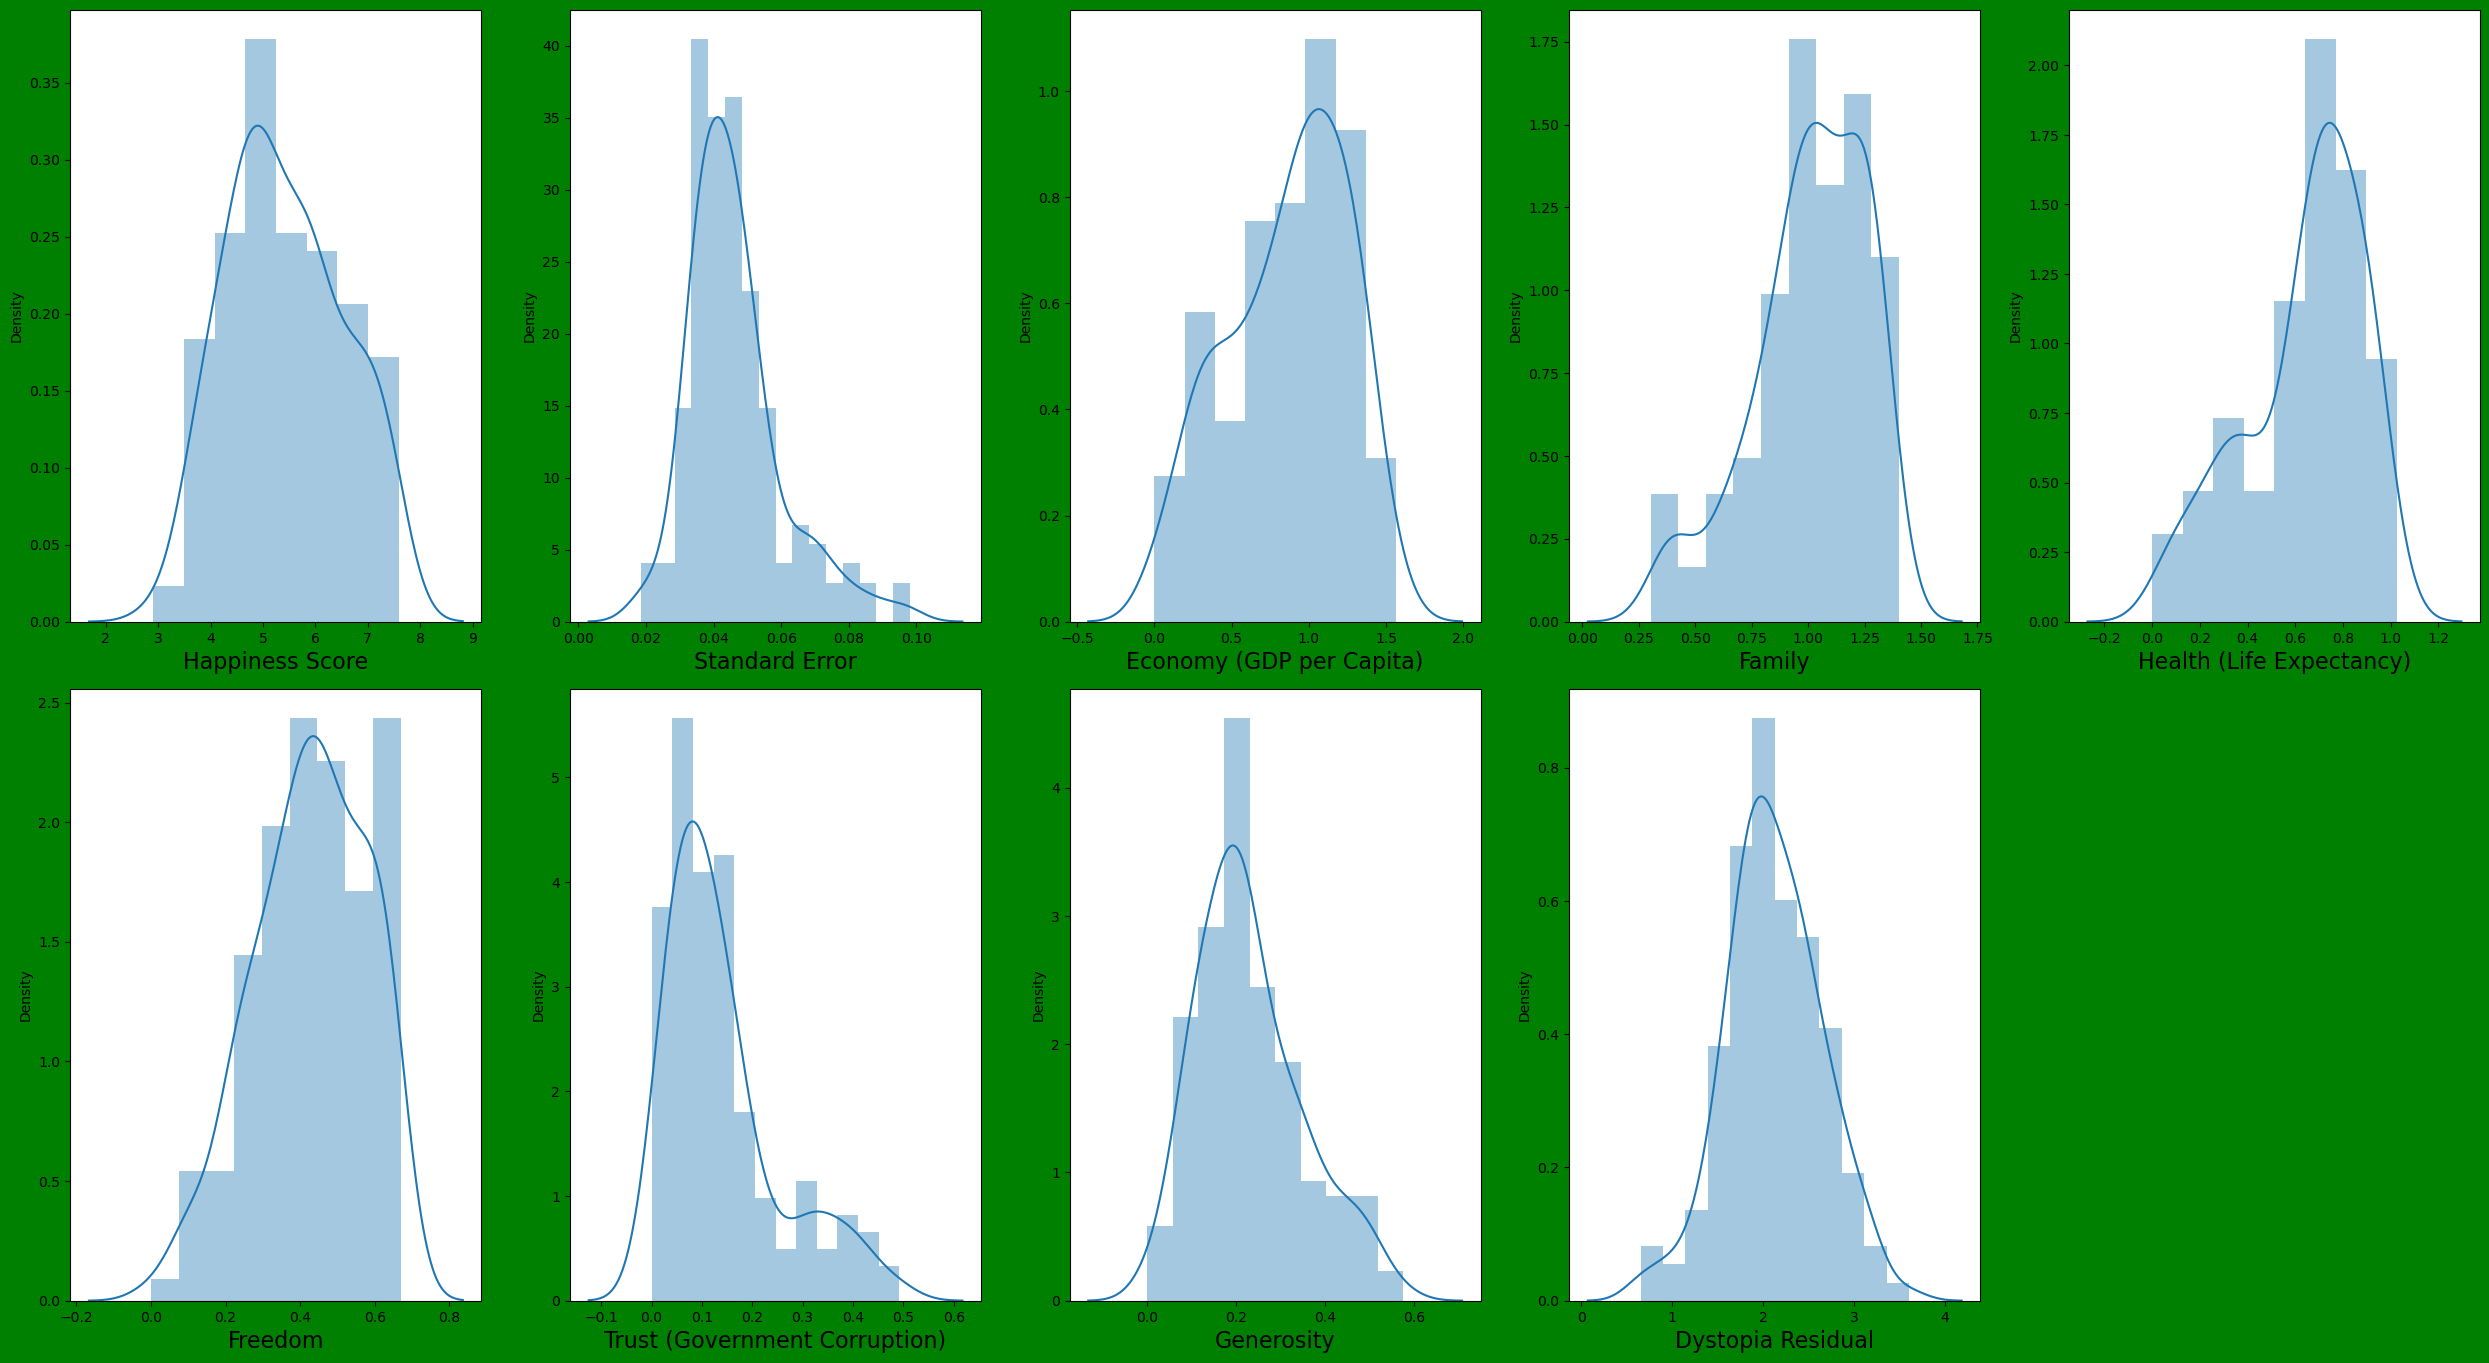

In [151]:
plt.figure(figsize=(25,20),facecolor="g")
plot=1
for i in new_df.columns:
    if plot<=15:
        if i=="Region":
            continue
        plt.subplot(3,5,plot)
        sns.distplot(new_df[i])
        plt.xlabel(i,fontsize=16)
    plot+=1
plt.tight_layout()    
plt.show()

**Here you can see all the columns are almost and equaly normally distributed**

# Checking Skewness:

In [152]:
new_df.skew().to_frame("Skewness value")

,Skewness value
Happiness Score,0.169740
Standard Error,1.243048
Economy (GDP per Capita),-0.390657
Family,-0.811340
Health (Life Expectancy),-0.747711
Freedom,-0.400867
Trust (Government Corruption),1.272530
Generosity,0.654710
Dystopia Residual,-0.021144


*Our default acceptable range for skewness is +0.5 to -0.5 and **we can see Standard Error,Family,Health (Life Expectancy),Trust (Government Corruption,Generosity these coluns are above or below compare with our acceptable range**.*

**So we have to remove their skewness.**                                                                                                                                 

In [153]:
#Removeing skewness using Cube root method
new_df["Standard Error"]=np.cbrt(new_df["Standard Error"])
new_df["Family"]=np.cbrt(new_df["Family"])
new_df["Health (Life Expectancy)"]=np.cbrt(new_df["Health (Life Expectancy)"])
new_df["Trust (Government Corruption"]=np.cbrt(new_df["Trust (Government Corruption)"])
new_df["Generosity"]=np.cbrt(new_df["Generosity"])

In [154]:
#Checking skewness again
new_df.skew()

Happiness Score                  0.169740
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                          -1.318995
Health (Life Expectancy)        -2.067331
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                      -1.087392
Dystopia Residual               -0.021144
Trust (Government Corruption    -0.064568
dtype: float64

**Here you can see some column's skewness is under acceptable range but some of the coumns's skewness are going beyond our acceptable range or our cube root did not affect them.So we are using another skewness removing method that is ***log*** lets see:**

In [163]:
#Appling log norm distribution to Family,Health (Life Expectancy),Trust (Government Corruption),Generosity to remove skewness

#taking a small number variable to deal with negative skewness
small_number=0.1
new_df["Generosity"]=np.log(new_df["Generosity"]+small_number)
new_df["Family"]=np.log(new_df["Family"]+small_number)
new_df["Health (Life Expectancy)"]=np.log(new_df["Health (Life Expectancy)"]+small_number)
new_df["Trust (Government Corruption"]=np.log(new_df["Trust (Government Corruption)"]+small_number)

In [164]:
#Checking skewness again
new_df.skew()

Happiness Score                  0.169740
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                                NaN
Health (Life Expectancy)              NaN
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                            NaN
Dystopia Residual               -0.021144
Trust (Government Corruption     0.473360
dtype: float64